In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_text

In [5]:
data = pd.read_csv("wine.data", header=None)

In [6]:
current_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
new_names = ['Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280/OD315_of_diluted_wines', 'Proline']
name_mapping = dict(zip(current_names, new_names))
data.columns = data.columns.to_series().replace(name_mapping)

In [7]:
# Separando características y etiquetas
X = data.drop('Class', axis=1)
y = data['Class']

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Dividiendo en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [11]:
y_pred = clf.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.94
              precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.93      1.00      0.97        14
           3       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



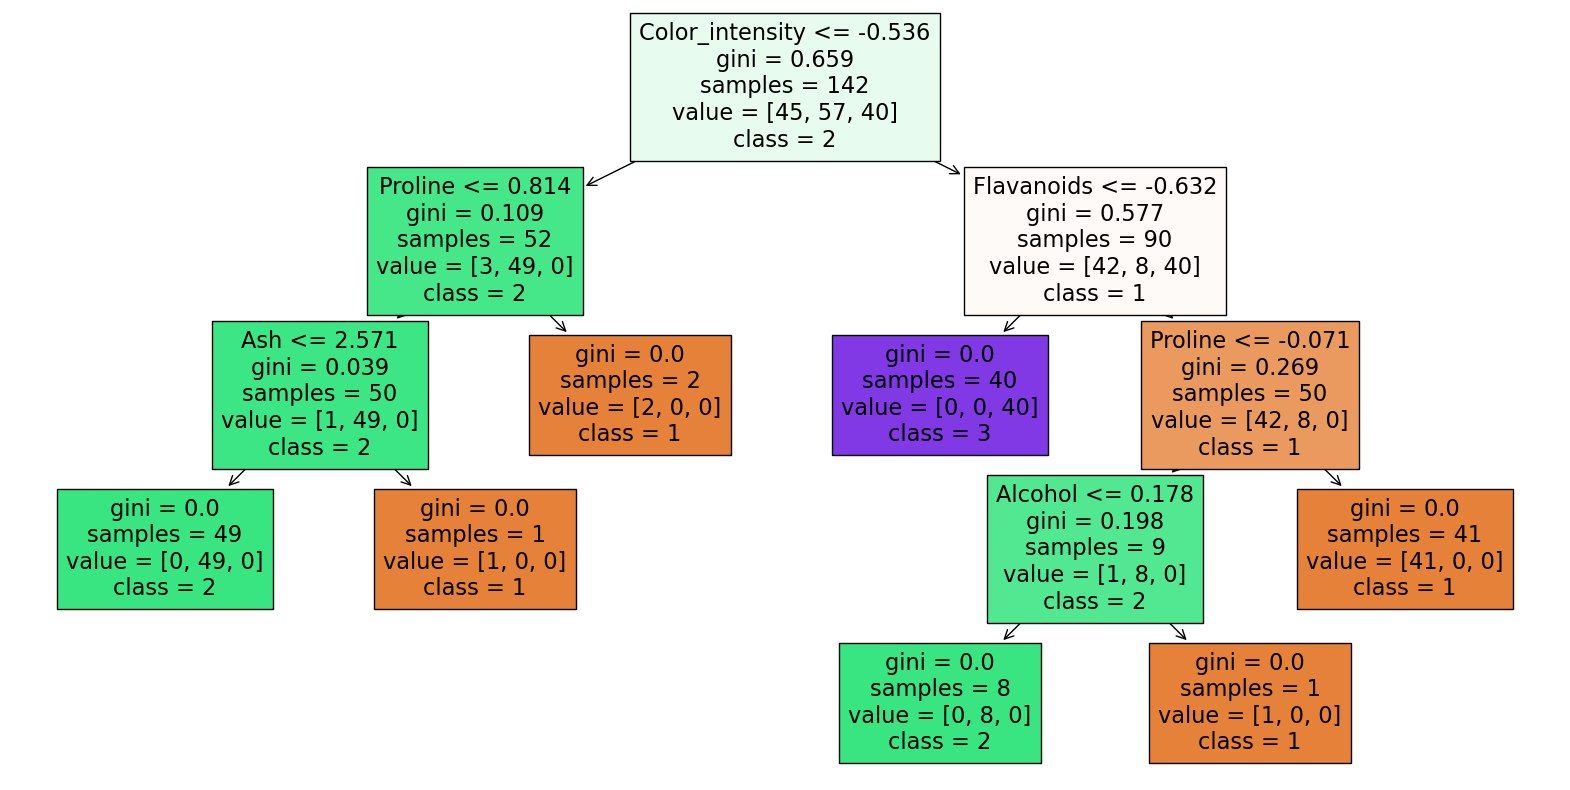

In [14]:
plt.figure(figsize=(20,10))
class_names_list = [str(cls) for cls in y.unique()]
plot_tree(clf, filled=True, feature_names=new_names[1:], class_names=class_names_list)
plt.show()